In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
# 한글설정

plt.rc('font',family='Malgun Gothic') #윈도우즈
plt.rc('axes', unicode_minus=False) #축설정 (축의 - 깨짐 방지)

In [3]:
df = pd.read_csv('data/일별평균대기오염도_2022(에어코리아).csv', encoding='cp949')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.1+ MB


In [4]:
# df['측정일시'] : 20220101 => '2022-01-01'=> datatime형으로 형변환(df['측정일'])
# 측정일시 : 숫자 / 측정일 : 날짜
df['측정일'] = df['측정일시'].astype(str)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          18250 non-null  int64  
 1   측정소명          18250 non-null  object 
 2   이산화질소농도(ppm)  18172 non-null  float64
 3   오존농도(ppm)     18176 non-null  float64
 4   일산화탄소농도(ppm)  18174 non-null  float64
 5   아황산가스농도(ppm)  18176 non-null  float64
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64
 8   측정일           18250 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 1.3+ MB


In [6]:
# 측정일의 숫자를 문자로 변환 (시리즈를 문자로)
df['측정일'] = df['측정일'].str[:4] + "-" \
+ df['측정일'].str[4:6] + "-" \
+ df['측정일'].str[6:]

In [7]:
df[['측정일시','측정일']].head(2)

,측정일시,측정일
0,20220101,2022-01-01
1,20220101,2022-01-01


In [8]:
# 측정일의 문자를 날짜형으로 변환
df['측정일'] = pd.to_datetime(df['측정일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          18250 non-null  int64         
 1   측정소명          18250 non-null  object        
 2   이산화질소농도(ppm)  18172 non-null  float64       
 3   오존농도(ppm)     18176 non-null  float64       
 4   일산화탄소농도(ppm)  18174 non-null  float64       
 5   아황산가스농도(ppm)  18176 non-null  float64       
 6   미세먼지농도(㎍/㎥)   18115 non-null  float64       
 7   초미세먼지농도(㎍/㎥)  18122 non-null  float64       
 8   측정일           18250 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 1.3+ MB


In [9]:
df.head(2)

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥),측정일
0,20220101,강남구,0.029,0.014,0.5,0.003,25.0,12.0,2022-01-01
1,20220101,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0,2022-01-01


In [10]:
# 현재 컬럼 목록 
# index의 객체 타입을 리스트로 변환이 필요
df.columns

Index(['측정일시', '측정소명', '이산화질소농도(ppm)', '오존농도(ppm)', '일산화탄소농도(ppm)',
       '아황산가스농도(ppm)', '미세먼지농도(㎍/㎥)', '초미세먼지농도(㎍/㎥)', '측정일'],
      dtype='object')

In [11]:
# 리스트로 변환한 현재 컬럼 목록
cols = df.columns.tolist()
cols

['측정일시',
 '측정소명',
 '이산화질소농도(ppm)',
 '오존농도(ppm)',
 '일산화탄소농도(ppm)',
 '아황산가스농도(ppm)',
 '미세먼지농도(㎍/㎥)',
 '초미세먼지농도(㎍/㎥)',
 '측정일']

In [12]:
# 컬럼에서 측정일 제거
cols.remove('측정일')
cols

['측정일시',
 '측정소명',
 '이산화질소농도(ppm)',
 '오존농도(ppm)',
 '일산화탄소농도(ppm)',
 '아황산가스농도(ppm)',
 '미세먼지농도(㎍/㎥)',
 '초미세먼지농도(㎍/㎥)']

In [13]:
new_cols = [cols[0],'측정일']+cols[1:]
df = df[new_cols]
df.head(2)

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
0,20220101,2022-01-01,강남구,0.029,0.014,0.5,0.003,25.0,12.0
1,20220101,2022-01-01,홍릉로,0.038,0.009,0.6,0.004,27.0,16.0


In [14]:
# 서울시 측정소명들
print('측정소명 갯수 : ', df['측정소명'].unique().shape[0])
print(df['측정소명'].unique())

측정소명 갯수 :  50
['강남구' '홍릉로' '행주' '항동' '한강대로' '청계천로' '천호대로' '중랑구' '중구' '종로구' '종로' '정릉로'
 '자연사박물관' '은평구' '용산구' '올림픽공원' '영등포로' '영등포구' '양천구' '신촌로' '시흥대로' '송파구' '세곡'
 '성북구' '성동구' '화랑로' '서초구' '서울숲' '서대문구' '북한산' '마포아트센터' '마포구' '동작대로' '동작구'
 '동대문구' '도산대로' '도봉구' '노원구' '남산' '금천구' '구로구' '광진구' '관악산' '관악구' '공항대로' '강서구'
 '강북구' '강변북로' '강동구' '강남대로']


In [15]:
loc_naem = '공항대로'
df_flt = df[df['측정소명']==loc_naem]
df_flt.head(2)

,측정일시,측정일,측정소명,이산화질소농도(ppm),오존농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),미세먼지농도(㎍/㎥),초미세먼지농도(㎍/㎥)
44,20220101,2022-01-01,공항대로,0.035,0.010,0.6,0.002,31.0,15.0
93,20220102,2022-01-02,공항대로,0.027,0.017,0.5,0.003,37.0,22.0


In [16]:
print('공항대로 데이터(df_flt) 갯수 :', len(df_flt))
print(df_flt.info())

공항대로 데이터(df_flt) 갯수 : 365
<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 44 to 18249
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          365 non-null    int64         
 1   측정일           365 non-null    datetime64[ns]
 2   측정소명          365 non-null    object        
 3   이산화질소농도(ppm)  365 non-null    float64       
 4   오존농도(ppm)     365 non-null    float64       
 5   일산화탄소농도(ppm)  365 non-null    float64       
 6   아황산가스농도(ppm)  365 non-null    float64       
 7   미세먼지농도(㎍/㎥)   365 non-null    float64       
 8   초미세먼지농도(㎍/㎥)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 28.5+ KB
None


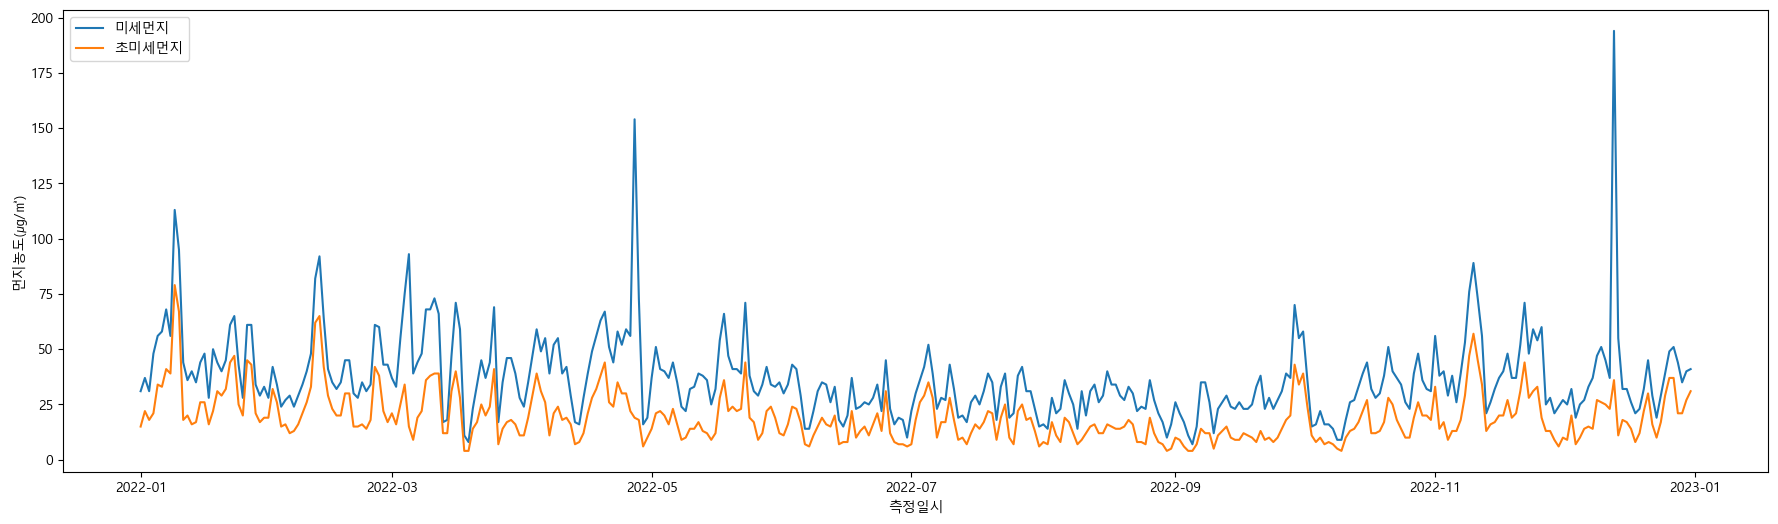

In [18]:
plt.figure(figsize=(22,6))
plt.plot(df_flt['측정일'], df_flt['미세먼지농도(㎍/㎥)'], label='미세먼지')
plt.plot(df_flt['측정일'], df_flt['초미세먼지농도(㎍/㎥)'], label='초미세먼지')
plt.xlabel('측정일시')
plt.ylabel('먼지농도(㎍/㎥)')
plt.legend(loc='upper left')
plt.show()

In [19]:
df_flt2 = df_flt[['측정일','미세먼지농도(㎍/㎥)']]
ts = df_flt2.set_index('측정일')
ts.head()

,미세먼지농도(㎍/㎥)
측정일,
2022-01-01,31.0
2022-01-02,37.0
2022-01-03,31.0
2022-01-04,48.0
2022-01-05,56.0


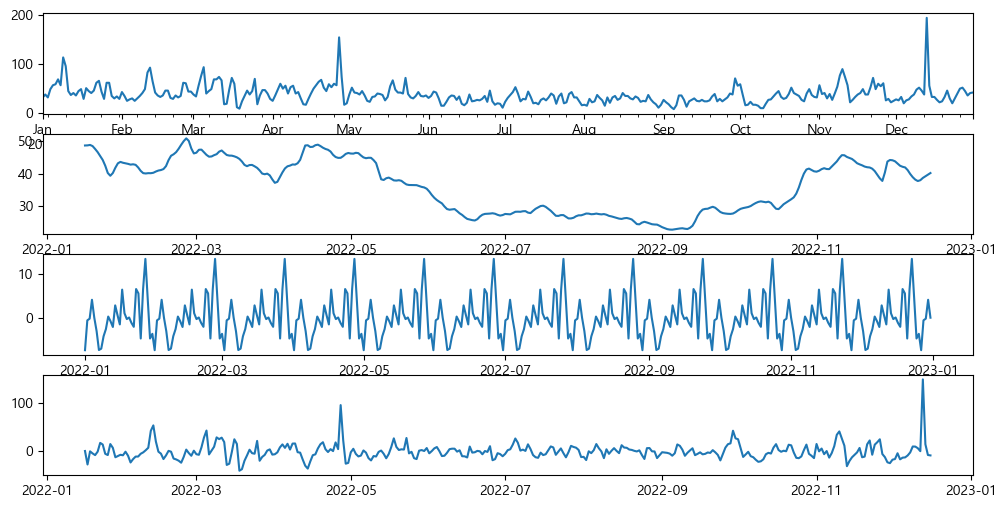

In [20]:
# 시계열 데이터의 구조를 분해해주는 도구 (예측은 x)
# 추세 분석, 계절성 분석, 잔차 분석(잔차는 덧셈으로 분석)
from statsmodels.tsa.seasonal import seasonal_decompose # 데이터를 불러들이고 구조를 분해만 해줌 
result = seasonal_decompose(ts['미세먼지농도(㎍/㎥)'],
                            model='additive', #실제값 추세, 계절성, 잔차
                            period=30, # 한달 단위로 계절성을 분석
                            )
# result : 분석결과
# result.observed : 실제값
# result.trend : 데이터의 장기적인 변화. 전반적으로 감소,증가
# result.seasonal : 주기적인 계절성 패턴 
# result.resid : 잔차 (실제값에서 추세나 계절성을 제외한 노이즈)
# 잔차 = 실제값 - 추세 - 계절성 
# axes[0].plot(result.observed)
fig, axes = plt.subplots(4,1, figsize=(12,6))
#axes[0].plot(result.observed)
result.observed.plot(ax=axes[0])
axes[1].plot(result.trend)
axes[2].plot(result.seasonal)
axes[3].plot(result.resid)
plt.show()

In [21]:
def plot_seasonal_decompose(result):
    fig, axes = plt.subplots(4,1, figsize=(12,6))
    result.observed.plot(ax=axes[0])
    axes[0].set_ylabel('관측값')
    axes[1].plot(result.trend)
    axes[1].set_ylabel('트렌드')
    axes[2].plot(result.seasonal)
    axes[2].set_ylabel('계절성')
    axes[3].plot(result.resid)
    axes[3].set_ylabel('잔차')
    plt.xlabel('날짜')
    plt.tight_layout()
    plt.show()

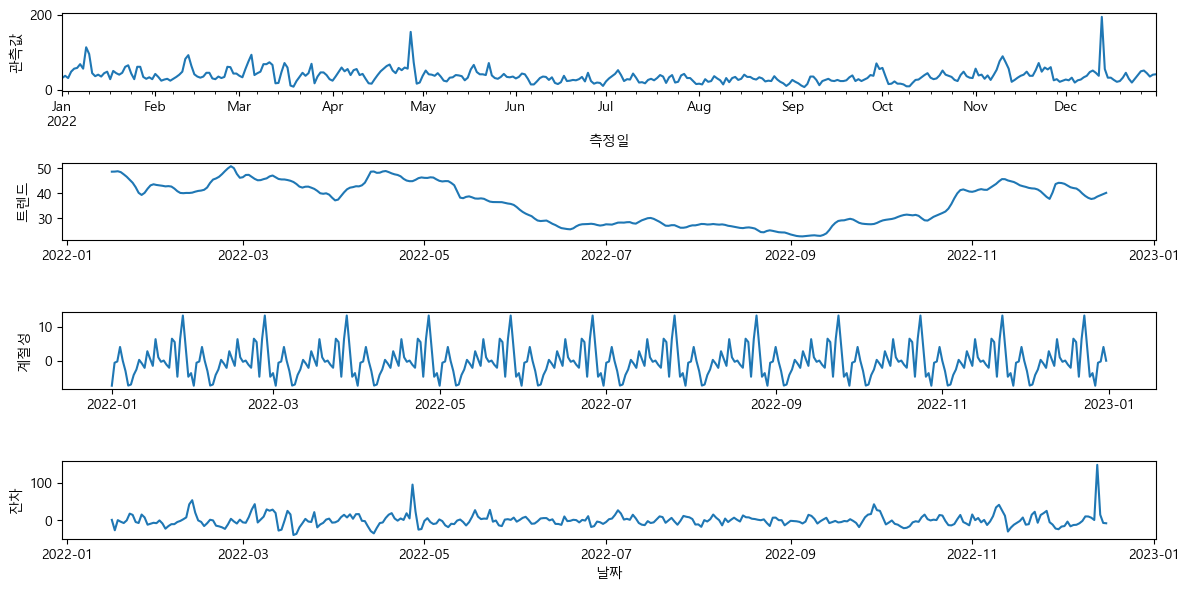

In [22]:
plot_seasonal_decompose(result)

## <span style='font-size:30px;'>seasonal_decompose(통계적 분석) & RNN/LSTM/GRU(예측) & Prophet (예측)</span>

## Prophet
- 계절성, 추세, 휴일효과 등을 자동으로 모델링
- pip install prophet (index로 들어오면 안되고 컬럼으로)/(컬럼이름도 라이브러리에 있는거로 해야함)
-라이브러리 :https://prophet.readthedocs.io/en/latest/quickstart.html

In [23]:
df_flt2.head(2)

,측정일,미세먼지농도(㎍/㎥)
44,2022-01-01,31.0
93,2022-01-02,37.0


In [24]:
df_flt2.columns = ['ds','y'] # prophet의 fit시 컬럼명을 ds,y로 변경 
df_flt2.head(2)

,ds,y
44,2022-01-01,31.0
93,2022-01-02,37.0


In [25]:
from prophet import Prophet
p_model = Prophet()
p_model.fit(df_flt2)

Importing plotly failed. Interactive plots will not work.
17:17:03 - cmdstanpy - INFO - Chain [1] start processing
17:17:03 - cmdstanpy - INFO - Chain [1] done processing


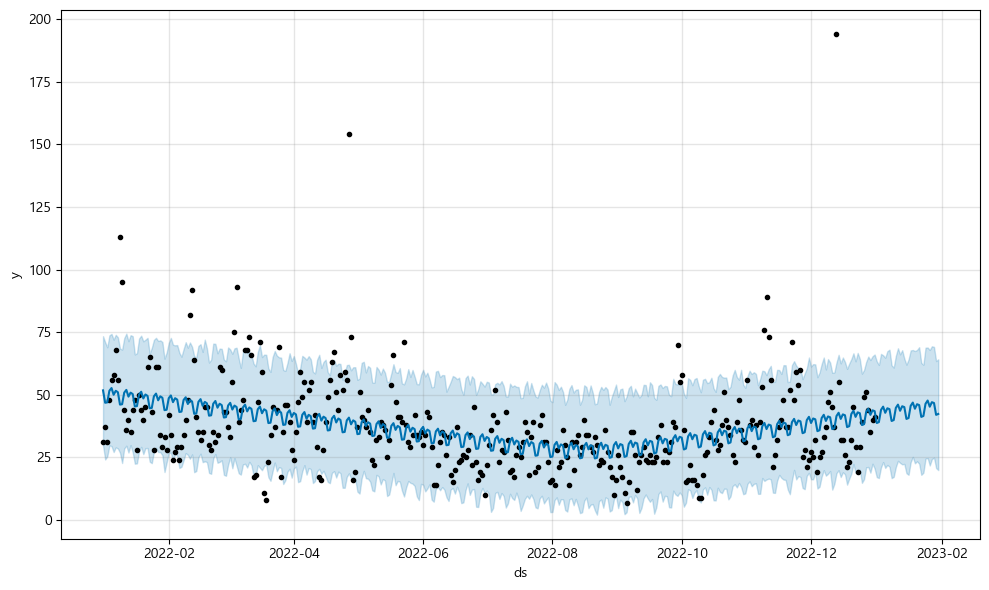

In [26]:
# p_model을 이용하여 30일 이후의 데이터를 예측
future = p_model.make_future_dataframe(periods=30)
forecast = p_model.predict(future)
forecast.head(2)
f = p_model.plot(forecast)

In [27]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [28]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
365,2023-01-01,38.738106,17.137176,63.348934
366,2023-01-02,39.108625,16.765437,61.919431
367,2023-01-03,43.966852,21.029491,66.329168
368,2023-01-04,45.272123,23.148881,65.784168
369,2023-01-05,42.812810,20.807479,64.800177
370,2023-01-06,44.613248,21.992687,67.404180
371,2023-01-07,44.275744,21.287032,68.012828
372,2023-01-08,39.550766,16.726117,61.784183
373,2023-01-09,39.921285,17.256646,60.853234
374,2023-01-10,44.779513,21.158793,65.548755


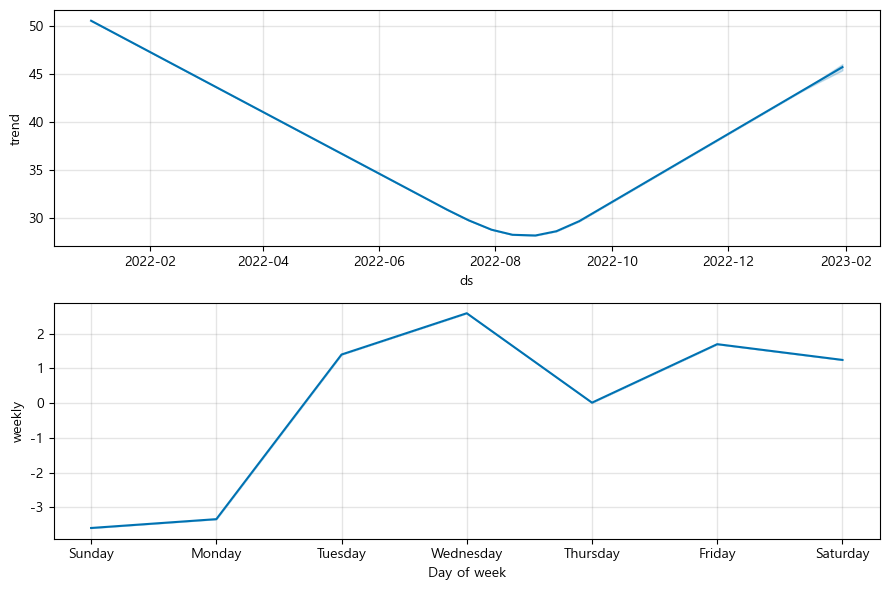

In [29]:
f2 = p_model.plot_components(forecast) # 트랜드와 휴일효과 그래프

In [34]:
forecast.loc[forecast['ds'] == '2023-01-16',['yhat','yhat_lower','yhat_upper']]

,yhat,yhat_lower,yhat_upper
380,40.733946,18.06292,64.114071
